In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from matplotlib.colors import ListedColormap
from sklearn import model_selection

plt.rcParams['axes.facecolor'] = 'white'

In [2]:
pokemons = pd.read_csv("Pokemon.csv")
len(pokemons)

800

In [3]:
pokemons = pokemons.drop(['#'], 1)
# pokemons = pokemons.drop(['Name'], 1)

In [4]:
pokemons.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
pokemons = pokemons.drop(['Name'], 1)

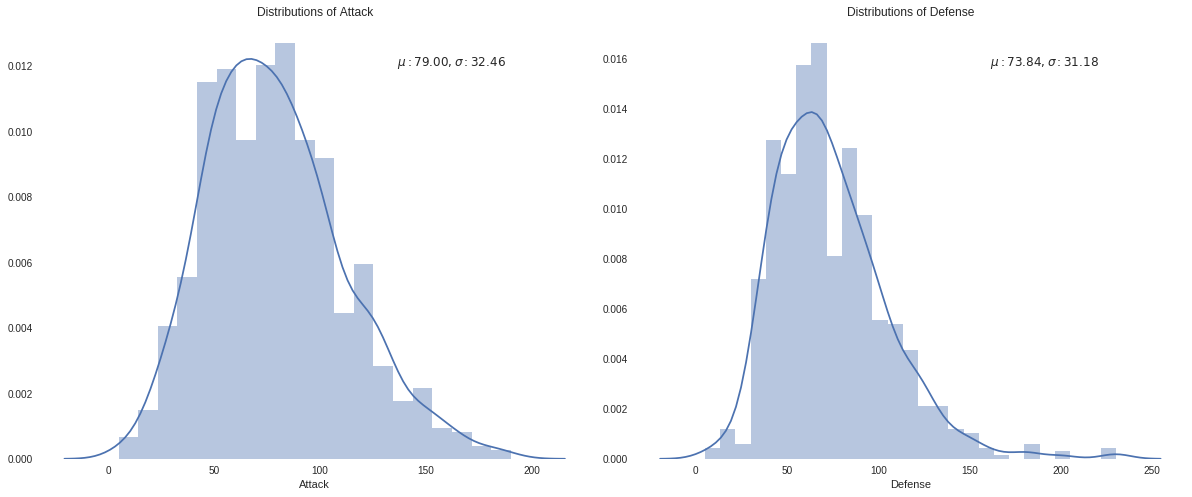

In [6]:
stats = pokemons[['Attack', 'Defense']]
plt.figure(figsize=(25, 20))

for ii, stat in enumerate(stats):
    title = "Distributions of {stat}".format(
        stat = stat
    )
    plt.subplot(3, 3, ii+1)
    plt.title(title)
    sns.distplot(pokemons[stat])
    x = plt.gca().get_xlim()[1] * .6
    y = plt.gca().get_ylim()[1] * .9
    plt.text(x, y, '$\mu: {mu: .2f}, \sigma: {sigma: .2f}$'.format(mu = pokemons[stat].mean(), sigma=pokemons[stat].std()))
    
    
plt.tight_layout()
plt.show()

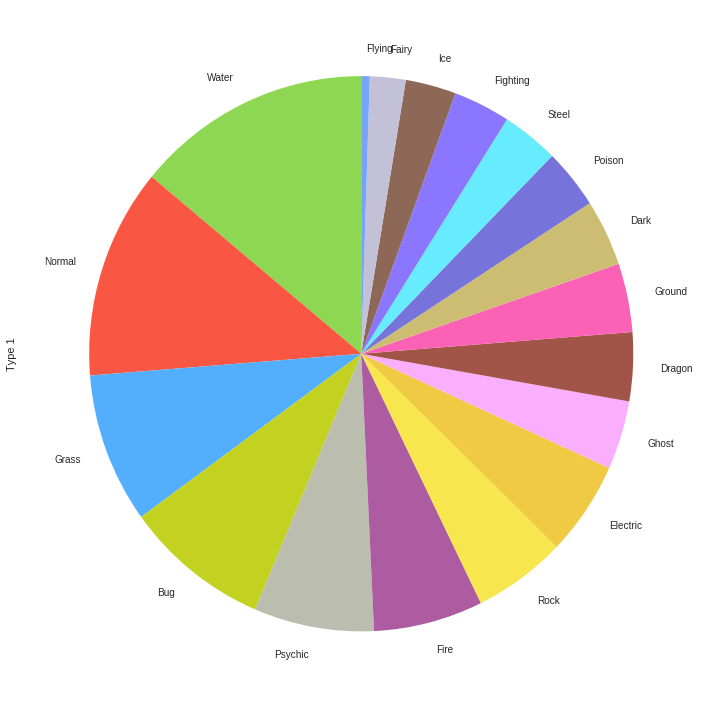

In [7]:
types = pokemons['Type 1']
colors = ["#8ED752", "#F95643", "#53AFFE", "#C3D221", "#BBBDAF",
    "#AD5CA2", "#F8E64E", "#F0CA42", "#F9AEFE", "#A35449",
    "#FB61B4", "#CDBD72", "#7673DA", "#66EBFF", "#8B76FF",
    "#8E6856", "#C3C1D7", "#75A4F9"]

types.value_counts().plot.pie(
    colors=colors,
    startangle=90,
    figsize=(10, 10)
)
plt.tight_layout()

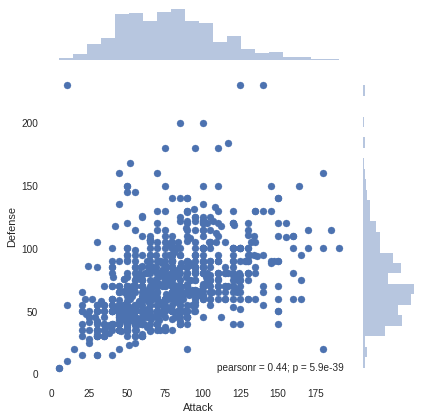

In [8]:
sns.jointplot(x="Attack", y="Defense", data=pokemons);

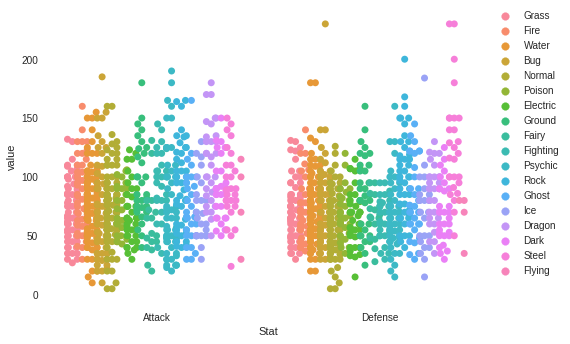

In [9]:
pkmn1 = pokemons[[ "Type 1", "Type 2", 'Attack', 'Defense']]
pkmn = pd.melt(pkmn1, id_vars=["Type 1", "Type 2"], var_name="Stat")
sns.swarmplot(x="Stat", y="value", data=pkmn, hue="Type 1", split=True, size=7)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

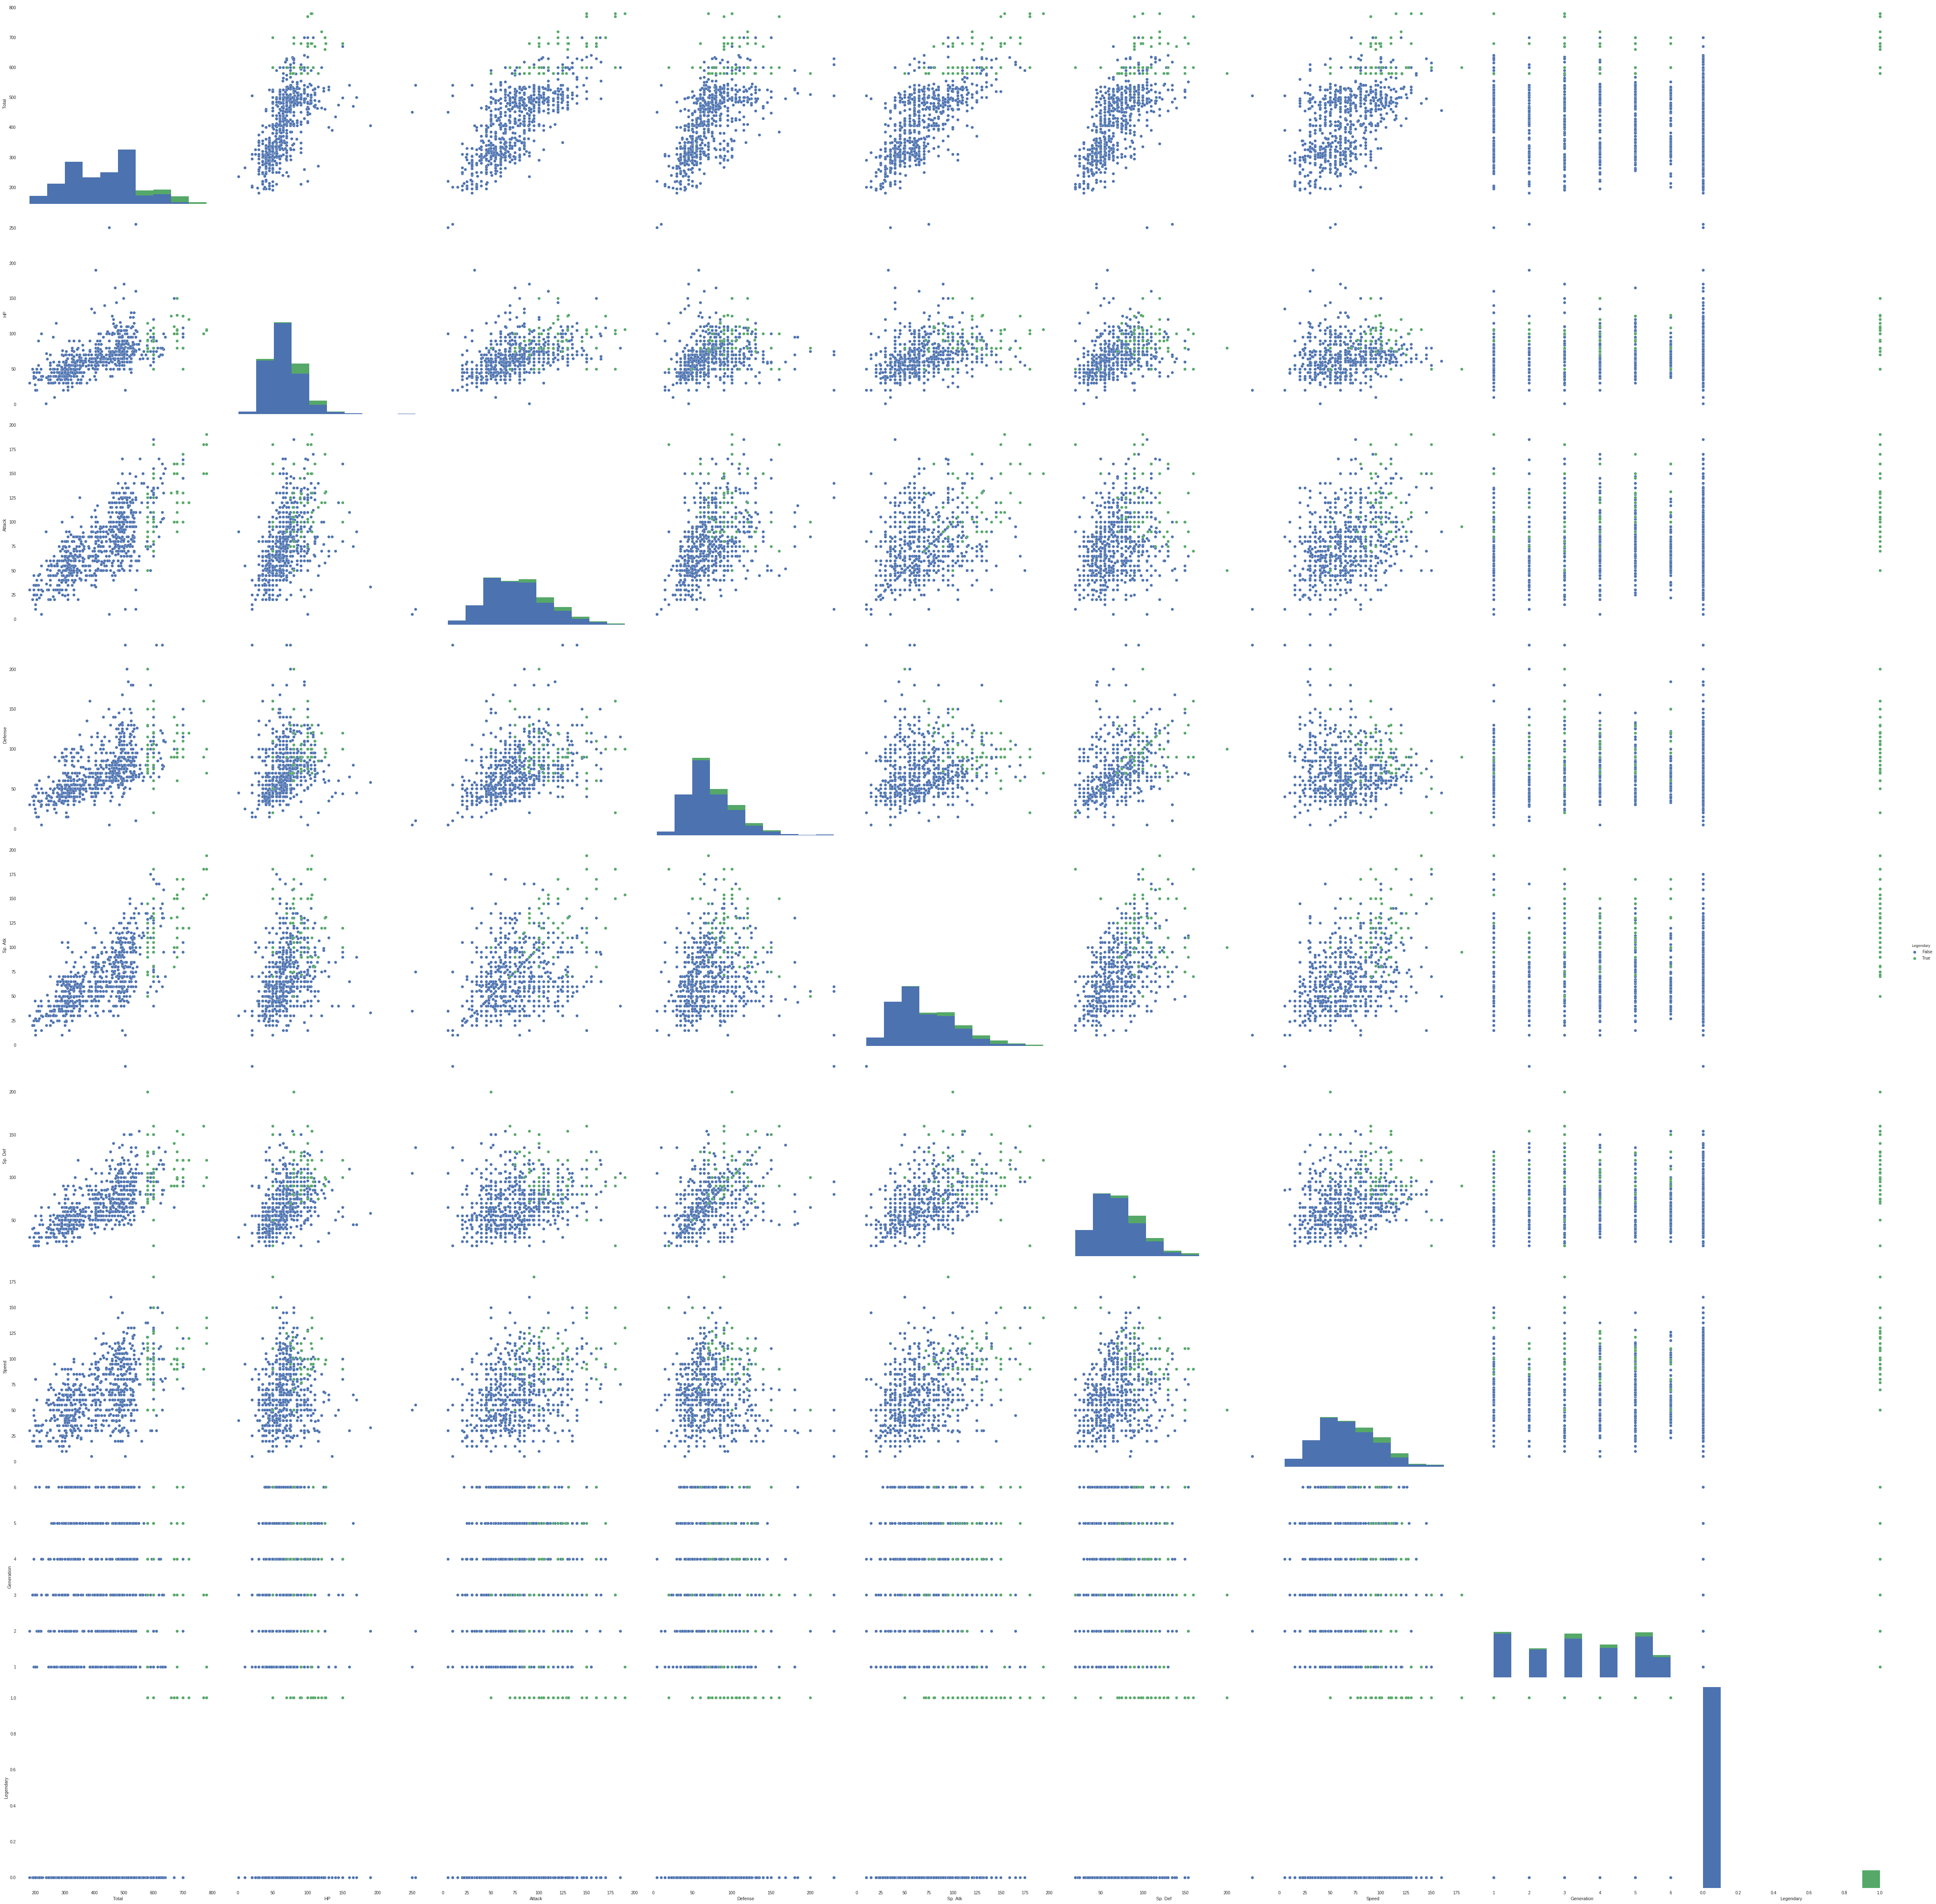

In [10]:
sns.pairplot(pokemons, hue="Legendary", size=7)

[False True]
735
65


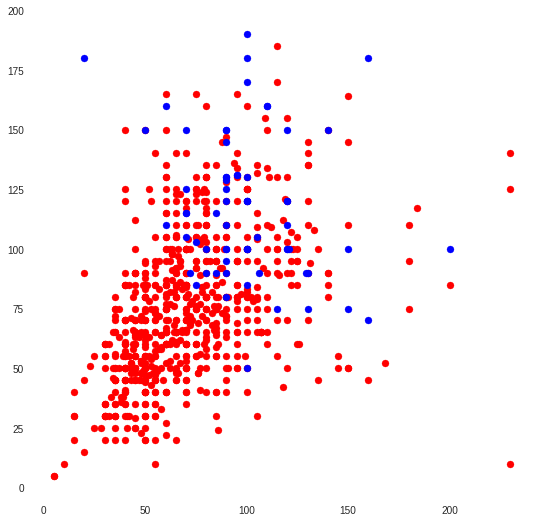

In [11]:
y = 'Attack'
x = 'Defense'
pokemons_a_d = pokemons[[x, y]]
y_field = 'Legendary'
types = pokemons[y_field].unique()
print(types)

plt.figure(figsize=(9, 9))
my_list = []
colors=('r', 'b')
for i, t in enumerate(types):
    print(len(pokemons[pokemons[y_field] == t]))
    m = pokemons_a_d[pokemons[y_field] == t]
    my_list.append(m)
    plt.scatter(m[[0]], m[[1]], c=colors[i])


/home/ktisha/.virtualenvs/ML17/lib/python3.5/site-packages/ipykernel/__main__.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


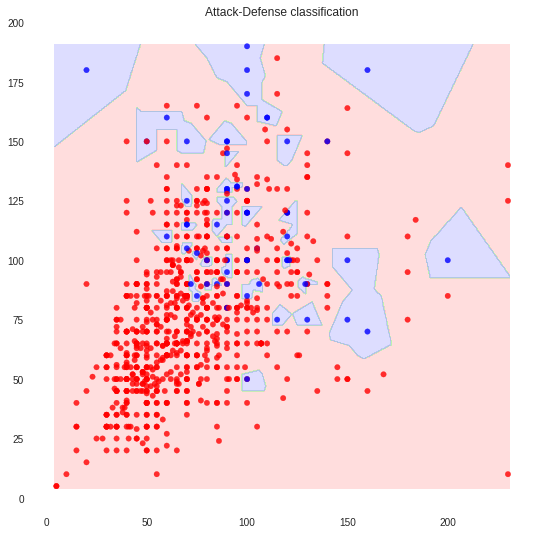

In [12]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

pokemons_a_d = pokemons[['Defense', 'Attack', 'Legendary']]

X = pokemons_a_d.ix[:, pokemons_a_d.columns != 'Legendary'].as_matrix()
y = pokemons_a_d[['Legendary']]

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)

not_legendary = pokemons_a_d[pokemons['Legendary'] == 0]
legendary = pokemons_a_d[pokemons['Legendary'] == 1]


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.4),
                     np.arange(y_min, y_max, 0.4))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(9, 9))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, cmap=cmap_bold, s=30)
plt.title("Attack-Defense classification")

In [13]:
X = pokemons.ix[:, pokemons.columns != 'Legendary']
y = pokemons[['Legendary']]

In [14]:
X = X.drop(['Type 1', 'Type 2'], 1)

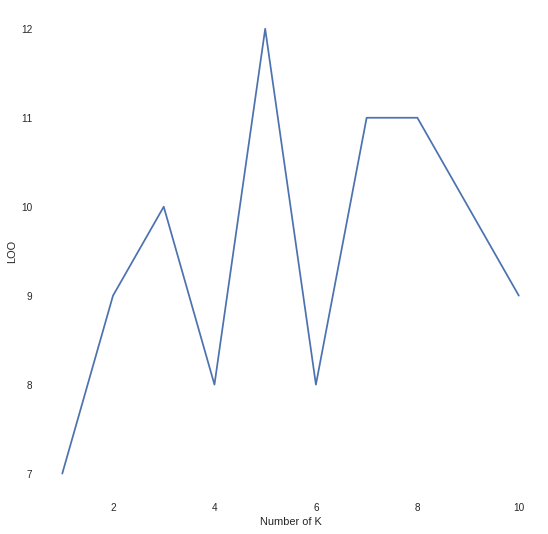

In [46]:
precisions = []
recalls = []
fs = []

y = np.asarray(y).ravel()
X_train, X_test, y_train, y_test =model_selection.train_test_split(
     X, y, test_size=0.3, random_state=42)

failed = []
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)

    a = y_test == predicted
    failed.append(len(a) - np.sum(a))
    
plt.figure(figsize=(9,9))

plt.plot(np.arange(1, 11), failed)
plt.ylabel('LOO')
plt.xlabel('Number of K')


In [ ]:
 from sklearn.model_selection import cross_val_score, LeaveOneOut
    
scores = cross_val_score(model, X, np.asarray(y).ravel(), cv = 2)
print (scores)


# for train_index, test_index in loo.split(X):
#    X_train, X_test = X[train_index], X[test_index]
#    y_train, y_test = y[train_index], y[test_index]
